# Example of deep NN for MNIST data

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt 
import idx2numpy

# Import dataset and convert to one-hot encoding and a [m,784] matrix

In [2]:
Y_test_classes = idx2numpy.convert_from_file('data/t10k-labels.idx1-ubyte')
X_test = idx2numpy.convert_from_file('data/t10k-images.idx3-ubyte')

Y_train_classes = idx2numpy.convert_from_file('data/train-labels.idx1-ubyte')
X_train = idx2numpy.convert_from_file('data/train-images.idx3-ubyte')

Digit= 5 Digit Encoded= [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


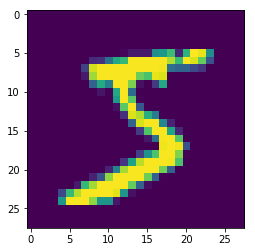

In [3]:
number_of_classes = np.unique(Y_test_classes).size

Y_test = np.eye(number_of_classes)[Y_test_classes]
Y_train = np.eye(number_of_classes)[Y_train_classes]

print("Digit=", Y_train_classes[0], "Digit Encoded=", Y_train[0])

plt.imshow(X_train[0])

In [4]:
# Convert input from image to 4D matrix
X_test = np.reshape(X_test,[-1,28,28,1])
X_train = np.reshape(X_train,[-1,28,28,1])

# Setup deep NN model
We'll be setting put a network with the following architecture:
CONV1 -> MAXPOOL1 -> CONV2 -> MAXPOOL2 -> FC RELU -> SOFTMAX

In [5]:
filters_conv1 = 32
filters_conv2 = 64
fc_size = 512

X = tf.placeholder(tf.float32, [None,28,28,1], name="input")
Y = tf.placeholder(tf.float32, [None,10], name="labels")

# Define variables for model
# CONV1 LAYER
W1 = tf.Variable( tf.truncated_normal([5,5,1,filters_conv1], stddev=0.1) )
b1 = tf.Variable(np.zeros(filters_conv1), dtype=tf.float32)

CONV1 = tf.nn.relu( tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding="SAME") + b1)
MAXPOOL1 = tf.nn.max_pool(CONV1, ksize=[1,2,2,1], strides=[1,2,2,1],padding="SAME")

# CONV2 LAYER
W2 = tf.Variable( tf.truncated_normal([5,5,filters_conv1,filters_conv2], stddev=0.1) )
b2 = tf.Variable(np.zeros(filters_conv2), dtype=tf.float32)

CONV2 = tf.nn.relu( tf.nn.conv2d(MAXPOOL1, W2,strides=[1,1,1,1],padding="SAME") + b2)
MAXPOOL2 = tf.nn.max_pool(CONV2, ksize=[1,2,2,1], strides=[1,2,2,1],padding="SAME")

# FC LAYER
W3 = tf.Variable( tf.truncated_normal([7*7*filters_conv2, fc_size], stddev=0.1 ))
b3 = tf.Variable(np.zeros(fc_size), dtype=tf.float32)

# Flatten image data
FLATTEN = tf.reshape(MAXPOOL2, [-1,7*7*filters_conv2])

# Fully-connected layer + dropout regularization
FC = tf.nn.relu( tf.matmul(FLATTEN, W3) + b3 )
keep_prob = tf.placeholder(tf.float32)
FC = tf.nn.dropout(FC, keep_prob)

# SOFTMAX layer
W4 = tf.Variable(tf.truncated_normal([fc_size, 10], stddev=0.1))
b4 = tf.Variable(np.zeros(10), dtype=tf.float32)

prediction = tf.matmul(FC, W4) + b4

## Define cost and optimizer

In [7]:
# Cost function will use cross entropy
cost_fn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=prediction))

# Optimizer
#learning_rate = 0.001
optimizer = tf.train.AdamOptimizer(0.3).minimize(cost_fn) 
#GradientDescentOptimizer(learning_rate).minimize(cost_fn)

# Execute training of model

In [12]:
# global execution engine variable initializer 
init = tf.global_variables_initializer()

# Setup model to run predictions and calculate accuracy 
# Evaluate predictions using tf.argmax to find call
correct_predictions = tf.equal(tf.argmax(Y,1), tf.argmax(prediction,1 ))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

with tf.Session() as sess:
    sess.run(init)
    
    iterations = 2
    batch_size = 200
    costs = []
    
    batches_in_training_set = math.floor(X_train.shape[0] / batch_size)
    for i in range(iterations):
        for b in range(batches_in_training_set):
            # Would be better to randomize the batches but this is OK for now
            X_train_batch = X_train[(b*batch_size):((b+1)*batch_size),:]
            Y_train_batch = Y_train[(b*batch_size):((b+1)*batch_size),:]
                
            _, cost = sess.run([optimizer,cost_fn], {X: X_train_batch, Y:Y_train_batch, keep_prob: 0.5})
            costs.append(cost)
            print(cost)
            
        print(cost)
            
    plt.plot(costs)
        
    print("Accuracy Test=", "{:.2f}%".format(100*sess.run(accuracy, {X: X_test, Y: Y_test, keep_prob: 1})))
    #print("Accuracy Train=", "{:.2f}%".format(100*sess.run(accuracy, {X: X_train, Y: Y_train, keep_prob: 1})))
    

1021.14014
31348.52
3136.9055
119.48605
463.37296
118.14853
32.870316
16.697119
12.974517
14.723721
8.700795
6.870035
4.394591
3.7840781
2.9269638
2.5335672
2.422878
2.4518414
2.4141257
2.3978684
2.3144968
2.3753788
2.307265
2.3153622
2.3746412
2.478251
2.2685227
2.286489
2.2652922
2.3674874
2.235303
2.248742
2.2359474
2.255494
2.2936802
2.2411213
2.2671359
2.2497365
2.236496
2.2302234
2.2653315
2.336017
2.2747414
2.3946464
2.2604918
2.2418532
2.2789314
2.2145243
2.2048812
2.197677
2.241356
2.2855496
2.3415515
2.2788973
2.244881
2.2688034
2.2092545
2.2520597
2.2734296
2.269765
2.155957
2.1896064
2.31708
2.275113
2.2453327
2.4091678
2.1882129
2.1538181
2.1935549
2.170491
2.3182364
2.250327
2.3024797
2.229329
2.2985897
2.2606683
2.188509
2.2135115
2.2602355
2.2438045
2.229853
2.2230635
2.1993766
2.153
2.177958
2.159575
2.1945853
2.136568
2.1588922
2.1680381
2.1714914
2.0757806
2.042174
2.11873


KeyboardInterrupt: 